# Atividade - Tratamento de Dados - Pandas

import os
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

## Step 1

* Carregue para um DataFrame a lista de municípios de fronteira do Brasil utilizando o arquivo "arq_municipios_fronteiricos.csv".

In [2]:
# Variavel contendo o nome do arquivo
arquivo = 'arquivos/arq_municipios_fronteiricos.csv'

# Complete o código abaixo para realizar a leitura do arquivo
# o arquivo utiliza tabulação como separador
# dentro de strings a tabulação é representada como ,
df = pd.read_csv(arquivo, sep = ',') 


# Visualize as 5 primeiras linhas do DataFrame
df.head(5)

,Município,Estado,Área territorial,População (IBGE/2007),Densidade demográfica (hab/km2),PIB (IBGE/2005,PIB per capita (R$),IDH/2000
0,1 – Aceguá,Rio Grande do Sul,1.550,4.138,"2,66",71.638.000,17.266,ni
1,2 – Acrelândia,Acre,1.575,11.520,"7,31",114.350.000,9.986,"0,680"
2,3 – Alecrim,Rio Grande do Sul,315.000,7.357,"23,35",44.373.000,5.944,"0,743"
3,4 – Almeirim,Pará,72.960,30.903,"0,42",462.258.000,13.485,"0,745"
4,5 – Alta Floresta d'Oeste,Rondônia,7.067,23.857,"3,37",186.812.000,6.525,"0,715"


In [3]:
df.Estado.unique()

array(['Rio Grande do Sul', 'Acre', 'Pará', 'Rondônia', 'Roraima',
       'Mato Grosso do Sul', 'Amazonas', 'Santa Catarina', 'Paraná',
       'Mato Grosso', 'Amapá', 'Santa Cataria'], dtype=object)

* Realize um tratamento na coluna Município para remover os números e hífens.
    * primeiro crie uma função recebe uma string com o nome do município, realiza a remoção dos números e hifens e retorna a nova string tratada
    * faça os testes com a sua função até que o resultado esteja satisfatório
    * passe a sua função como parâmetro para o método apply do DataFrame

In [4]:
# função que irá realizar o tratamento para um município
def tratar_nome_municipio(nome_municipio):
    #realize a limpeza
    nome_municipio_tratado = re.sub(r'([\d]* [–-] )(.*)', r'\2', nome_municipio)    
    return nome_municipio_tratado

In [5]:
tratar_nome_municipio('1 – Aceguá')

'Aceguá'

In [6]:
# aplique a função utilizando o método apply
municipios_tratados = df['Município'].apply(tratar_nome_municipio)
df['Município'] = municipios_tratados

In [7]:
# exiba todos os dados e verifique se o resultado está correto
df.head(20)

,Município,Estado,Área territorial,População (IBGE/2007),Densidade demográfica (hab/km2),PIB (IBGE/2005,PIB per capita (R$),IDH/2000
0,Aceguá,Rio Grande do Sul,1.550,4.138,"2,66",71.638.000,17.266,ni
1,Acrelândia,Acre,1.575,11.520,"7,31",114.350.000,9.986,"0,680"
2,Alecrim,Rio Grande do Sul,315.000,7.357,"23,35",44.373.000,5.944,"0,743"
3,Almeirim,Pará,72.960,30.903,"0,42",462.258.000,13.485,"0,745"
4,Alta Floresta d'Oeste,Rondônia,7.067,23.857,"3,37",186.812.000,6.525,"0,715"
5,Alto Alegre,Roraima,25.567,14.386,"0,56",115.786.000,5.239,"0,662"
6,Alto Alegre dos Parecis,Rondônia,3.959,11.615,"2,93",90.226.000,6.001,ni
7,Amajari,Roraima,28.472,7.586,"0,26",31.897,5.240.000,"0,654"
8,Antônio João,Mato Grosso do Sul,1.144,8.350,"7,29",39.989.000,5.067,"0,702"
9,Aral Moreira,Mato Grosso do Sul,1.656,9.236,"5,57",105.697.000,13 132,"0,723"


Algumas linhas ainda possuem hífen e números?

In [8]:
# problemas com caracteres são comuns
print(hex(ord('-'))) # código UTF8 do caracter (hexadecimal)
print(hex(ord('–'))) # código UTF8 do caracter (hexadecimal)
'-' == '–'

0x2d
0x2013


False

* HYPHEN-MINUS: __&#x2D;__
    * https://www.fileformat.info/info/unicode/char/2d/index.htm
* EN DASH: __&#x2013;__
    * https://www.fileformat.info/info/unicode/char/2013/index.htm

In [9]:
# com todos os municípios devidamente tratados
# sobrescreva a coluna Município com os novos valores

# exiba as informações
df

,Município,Estado,Área territorial,População (IBGE/2007),Densidade demográfica (hab/km2),PIB (IBGE/2005,PIB per capita (R$),IDH/2000
0,Aceguá,Rio Grande do Sul,1.550,4.138,"2,66",71.638.000,17.266,ni
1,Acrelândia,Acre,1.575,11.520,"7,31",114.350.000,9.986,"0,680"
2,Alecrim,Rio Grande do Sul,315.000,7.357,"23,35",44.373.000,5.944,"0,743"
3,Almeirim,Pará,72.960,30.903,"0,42",462.258.000,13.485,"0,745"
4,Alta Floresta d'Oeste,Rondônia,7.067,23.857,"3,37",186.812.000,6.525,"0,715"
...,...,...,...,...,...,...,...,...
117,Tunápolis,Santa Cataria,133.000,4.650,"34,96",40.845.000,9.420,"0,821"
118,Uiramutã,Roraima,8.066,7.403,"0,91",27.251.000,4.238,"0,542"
119,Uruguaiana,Rio Grande do Sul,5.716,123.743,"21,64",1.187.038.000,8.798,"0,788"
120,Vila Bela da Santíssima Trindade,Mato Grosso,13.631,13.886,"1,01",116.908.000,8.047,"0,715"


In [10]:
df[df['IDH/2000'] == 'ni']['IDH/2000'].count()

18

## EX02

Ainda utilizando o DataFrame carregado no exercício anterior, verifique os tipos de dados das colunas do dataframe. Todos os dados numéricos deverão ser transformados para tipos numéricos.

* utilize o método info() do DataFrame para saber detalhes dos tipos de dados das colunas
* verifique se os números possuem os símbolos de decimal e separadores de milhar compatíveis com a linguagem. Se necessário, fazer as substituições pertinentes.

In [11]:
# verifique os tipos das colunas do DataFrame. Utilize o método info(): df_muni_front
#df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Município                        122 non-null    object 
 1   Estado                           122 non-null    object 
 2   Área territorial                 122 non-null    float64
 3   População (IBGE/2007)            122 non-null    float64
 4   Densidade demográfica (hab/km2)  122 non-null    object 
 5   PIB (IBGE/2005                   122 non-null    object 
 6   PIB per capita (R$)              122 non-null    object 
 7   IDH/2000                         122 non-null    object 
dtypes: float64(2), object(6)
memory usage: 7.8+ KB


In [12]:
# faça a conversão do campo 'Área territorial'
def converter_para_float(texto):
    # faça as operações necessárias e 
    # devolva um objeto do tipo float
    # ou np.NaN (tipo Not a Number do numpy)
    t = texto.replace(' ','').replace('.','').replace(',','.');
    return float(t)

# aplique a função de conversão utilizando o método apply na coluna 'Área territorial'
#area_territorial = converter_para_float(df['Área territorial'])
# exiba alguns valores da com valores convertidos
for var in ['Densidade demográfica (hab/km2)', 'PIB (IBGE/2005', 'PIB per capita (R$)']:
    df[var] = df[var].apply(converter_para_float) 

In [13]:
# imprima novamente as informações das colunas e verifique os tipos
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Município                        122 non-null    object 
 1   Estado                           122 non-null    object 
 2   Área territorial                 122 non-null    float64
 3   População (IBGE/2007)            122 non-null    float64
 4   Densidade demográfica (hab/km2)  122 non-null    float64
 5   PIB (IBGE/2005                   122 non-null    float64
 6   PIB per capita (R$)              122 non-null    float64
 7   IDH/2000                         122 non-null    object 
dtypes: float64(5), object(3)
memory usage: 7.8+ KB


In [14]:
# imprima novamente as primeiras linhas do DataFrame
df

,Município,Estado,Área territorial,População (IBGE/2007),Densidade demográfica (hab/km2),PIB (IBGE/2005,PIB per capita (R$),IDH/2000
0,Aceguá,Rio Grande do Sul,1.550,4.138,2.66,7.163800e+07,17266.0,ni
1,Acrelândia,Acre,1.575,11.520,7.31,1.143500e+08,9986.0,"0,680"
2,Alecrim,Rio Grande do Sul,315.000,7.357,23.35,4.437300e+07,5944.0,"0,743"
3,Almeirim,Pará,72.960,30.903,0.42,4.622580e+08,13485.0,"0,745"
4,Alta Floresta d'Oeste,Rondônia,7.067,23.857,3.37,1.868120e+08,6525.0,"0,715"
...,...,...,...,...,...,...,...,...
117,Tunápolis,Santa Cataria,133.000,4.650,34.96,4.084500e+07,9420.0,"0,821"
118,Uiramutã,Roraima,8.066,7.403,0.91,2.725100e+07,4238.0,"0,542"
119,Uruguaiana,Rio Grande do Sul,5.716,123.743,21.64,1.187038e+09,8798.0,"0,788"
120,Vila Bela da Santíssima Trindade,Mato Grosso,13.631,13.886,1.01,1.169080e+08,8047.0,"0,715"


## EX03



Crie uma coluna com a sigla dos estados.

* crie um set à partir da coluna Estados. Atribua a uma variável chamada __nomes_estados__.

In [15]:
# crie o set e verifique o seu conteúdo
nomes_estados = set(df['Estado'])
#nomes_estados = df['Estado'].unique()

# exiba o set gerado
nomes_estados

{'Acre',
 'Amapá',
 'Amazonas',
 'Mato Grosso',
 'Mato Grosso do Sul',
 'Paraná',
 'Pará',
 'Rio Grande do Sul',
 'Rondônia',
 'Roraima',
 'Santa Cataria',
 'Santa Catarina'}

Você identificou um problema no nome dos estados?
Vamos corrigir no final.

* crie um dicionário onde o nome completo do estado é a chave e a sigla é o valor: __dic_nomes_siglas__

In [16]:
# crie o dicionário
dic_nomes_siglas = {
    'Acre': 'AC',
    'Amapá': 'AP',
    'Amazonas': 'AM',
    'Mato Grosso': 'MT',
    'Mato Grosso do Sul': 'MS',
    'Paraná': 'PR',
    'Pará': 'PA',
    'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO',
    'Roraima': 'RR',
    'Santa Cataria': 'SC',
    'Santa Catarina': 'SC'
}

dic_nomes_siglas

{'Acre': 'AC',
 'Amapá': 'AP',
 'Amazonas': 'AM',
 'Mato Grosso': 'MT',
 'Mato Grosso do Sul': 'MS',
 'Paraná': 'PR',
 'Pará': 'PA',
 'Rio Grande do Sul': 'RS',
 'Rondônia': 'RO',
 'Roraima': 'RR',
 'Santa Cataria': 'SC',
 'Santa Catarina': 'SC'}

* utilize a função map do DataFrame para criar uma nova coluna de siglas à partir dos nomes dos estados. Passe o dicionário criado para a função map. Atribua a Série criada à variável __coluna_siglas_uf__.

In [17]:
# faça o mapeamento dos valores e atribua a : coluna_siglas_uf
coluna_siglas_uf = df['Estado'].map(dic_nomes_siglas)

# verifique os 10 primeiros itens criados
coluna_siglas_uf.head(10)

0    RS
1    AC
2    RS
3    PA
4    RO
5    RR
6    RO
7    RR
8    MS
9    MS
Name: Estado, dtype: object

In [18]:
# crie a coluna sigla
df['Sigla'] = coluna_siglas_uf
# verifique as informações do dataframe
df.head()

,Município,Estado,Área territorial,População (IBGE/2007),Densidade demográfica (hab/km2),PIB (IBGE/2005,PIB per capita (R$),IDH/2000,Sigla
0,Aceguá,Rio Grande do Sul,1.550,4.138,2.66,71638000.0,17266.0,ni,RS
1,Acrelândia,Acre,1.575,11.520,7.31,114350000.0,9986.0,"0,680",AC
2,Alecrim,Rio Grande do Sul,315.000,7.357,23.35,44373000.0,5944.0,"0,743",RS
3,Almeirim,Pará,72.960,30.903,0.42,462258000.0,13485.0,"0,745",PA
4,Alta Floresta d'Oeste,Rondônia,7.067,23.857,3.37,186812000.0,6525.0,"0,715",RO


In [19]:
# verifique quantos registros possuem o nome do estado de Santa Catarina escrito errado "Santa Cataria"
df[df['Estado'] == 'Santa Cataria']

,Município,Estado,Área territorial,População (IBGE/2007),Densidade demográfica (hab/km2),PIB (IBGE/2005,PIB per capita (R$),IDH/2000,Sigla
117,Tunápolis,Santa Cataria,133.0,4.65,34.96,40845000.0,9420.0,"0,821",SC


In [20]:
# faça a correção dos registros que possuem o nome do estado de Santa Catarina escrito errado
df.loc[df['Estado'] == 'Santa Cataria', 'Estado'] = 'Santa Catarina'

In [21]:
# verifique, novamente, quantos registros possuem o nome do estado de Santa Catarina escrito errado
df[df['Estado'] == 'Santa Cataria']

,Município,Estado,Área territorial,População (IBGE/2007),Densidade demográfica (hab/km2),PIB (IBGE/2005,PIB per capita (R$),IDH/2000,Sigla


## EX04

Identifique quais municípios possuem 2 ou mais desvios na coluna PIB.

C:\Users\rober\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


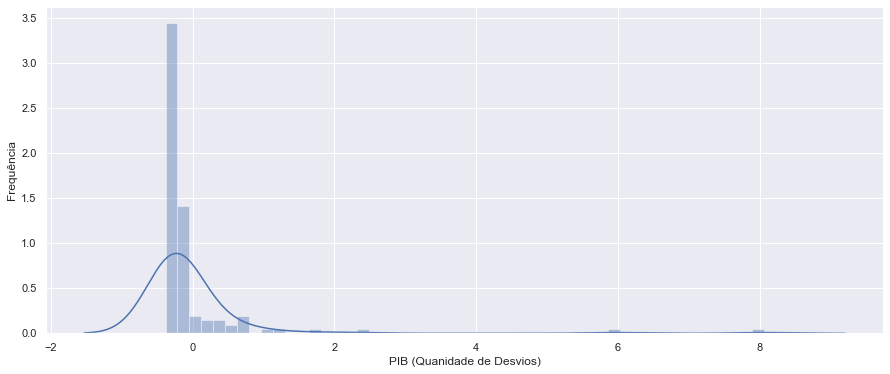

In [22]:
# Normalize a coluna PIB em quantidade de desvios padrão
## x = ( valor - média da coluna ) / desvio padrão da coluna 
## Usaremos a função lambda
### (df['PIB (IBGE/2005'] - df['PIB (IBGE/2005'].mean())/df['PIB (IBGE/2005'].std()
#### Se x == 0: média
#### Se x < 0 : à esq da média (desvio negativo)
#### Se x > 0 : à dir da média (desvio positivo)
pib_desvios = df['PIB (IBGE/2005'].apply(lambda x: (x - df['PIB (IBGE/2005'].mean())/df['PIB (IBGE/2005'].std())
# exiba um histograma para as informações de PIB normalizado
plt.figure(figsize=(15,6))
sns.distplot(pib_desvios.dropna(), bins=50)
plt.xlabel('PIB (Quanidade de Desvios)')
plt.ylabel('Frequência')

plt.show()

- Quais PIBs estão elevados? À direita da média?

In [23]:
# quais cidades possuem mais de 2 desvios 
df['pib_desvios'] = pib_desvios

df[df['pib_desvios'] > 2] # PIBs mais elevados da base de dados

,Município,Estado,Área territorial,População (IBGE/2007),Densidade demográfica (hab/km2),PIB (IBGE/2005,PIB per capita (R$),IDH/2000,Sigla,pib_desvios
33,Corumbá,Mato Grosso do Sul,65.304,114.279,1.74,1.557253e+09,13234.0,"0,771",MS,2.323594
45,Foz do Iguaçu,Paraná,618.000,311.336,503.70,4.853331e+09,16102.0,"0,802",PR,8.051502
89,Porto Velho,Rondônia,34.082,369.345,10.83,3.656512e+09,9779.0,"0,763",RO,5.971676


## EX05

Perguntas rápidas.

In [31]:
# Quantos registros possuem NaN na coluna IDH/2000?
len(df.loc[df['IDH/2000'] == 'ni'])
#df[df['IDH/2000'] == 'ni']['IDH/2000'].count()

18

In [28]:
# Quantas cidades por estado?
df.Estado.value_counts()

Rio Grande do Sul     29
Acre                  17
Paraná                17
Mato Grosso do Sul    12
Santa Catarina        10
Rondônia               9
Amazonas               9
Roraima                9
Mato Grosso            5
Pará                   3
Amapá                  2
Name: Estado, dtype: int64

In [32]:
# Faça a ordenação do DataFrame pelo nome do município
df.sort_values(by['Municipio'])

# A ordenação está correta?
#Não. A cidade de Óbidos, acentuada, ficou incorretame

NameError: name 'by' is not defined